# LAB#6


NAME= GAJULA.KAVYASRI

Roll number= CS20B1126


Perform the various regression model svm, linear, logistic  with and without regularization discussed in today session on housing. csv file

It will be divided in following manner

Data collection

Data analyze

Data wrangling

Train test

Modeling 

Performance analysis

compare the performance analysis of regression models

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from  sklearn.impute import SimpleImputer  
from sklearn import metrics

# Data Collection

In [107]:
df=pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [108]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data analyze

In [109]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [110]:
format(df.shape)

'(20640, 10)'

In [111]:
format(df.columns)

"Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',\n       'total_bedrooms', 'population', 'households', 'median_income',\n       'median_house_value', 'ocean_proximity'],\n      dtype='object')"

In [112]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [113]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [114]:
col = df.select_dtypes(["object"]).columns
df[col] = df[col].apply(lambda x: pd.factorize(x)[0])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


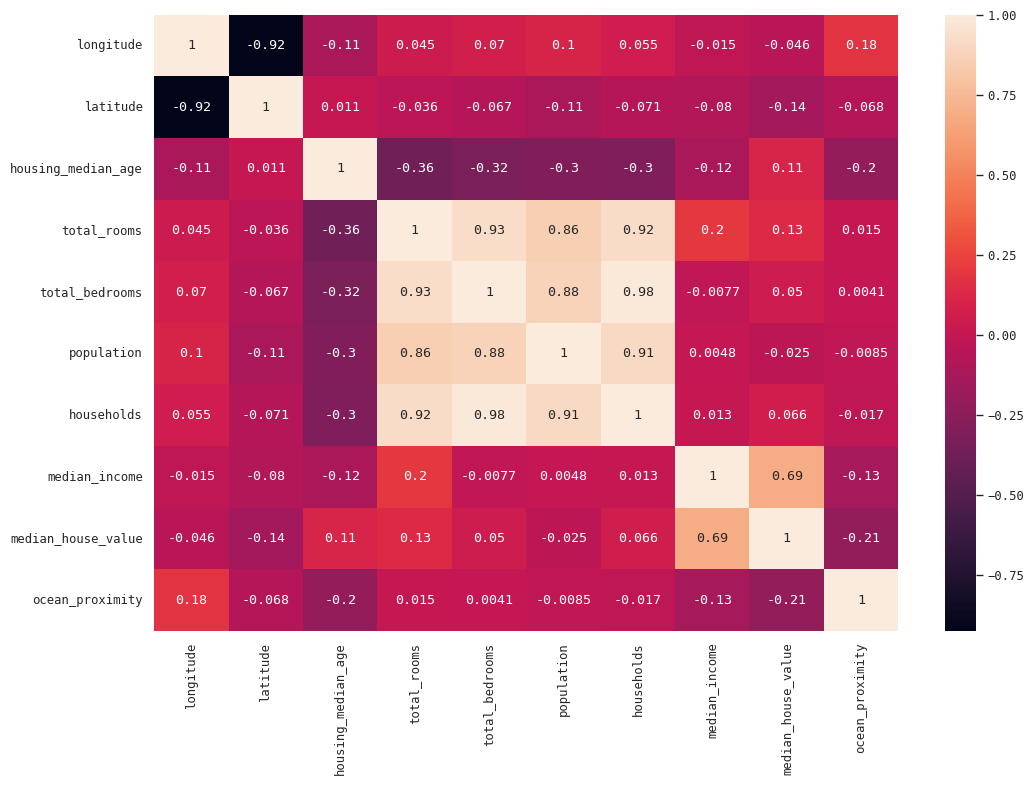

In [115]:

import seaborn as sns

#heatmap using seaborn
sns.set(context="paper",font="monospace")
housing_corr_matrix = df.corr()
fig, axe = plt.subplots(figsize=(12,8))
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
sns.heatmap(housing_corr_matrix,annot=True );

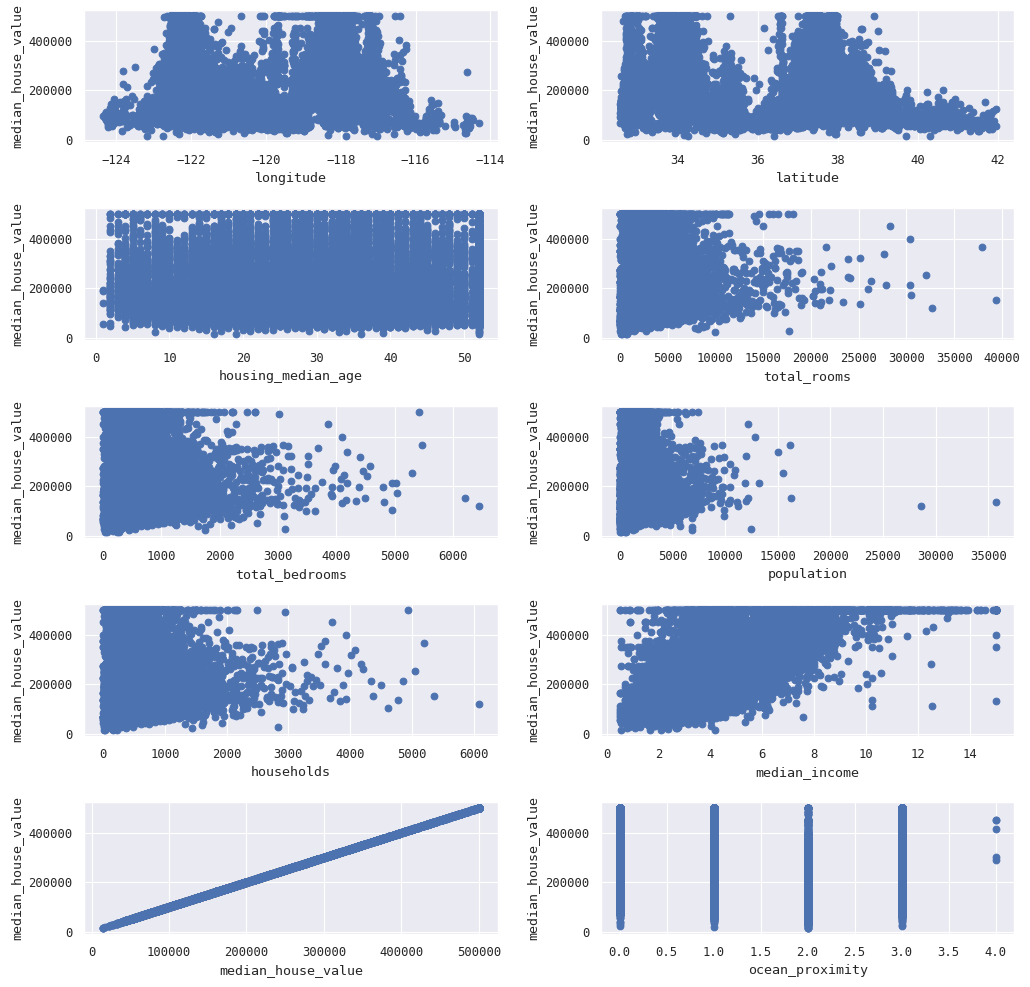

In [116]:
features = df.columns
ylabel = "median_house_value"
fig, axe = plt.subplots(5, 2, figsize=(12,12))
for i in range(1,11):
    plt.subplot(5,2,i)
    plt.scatter(df[features[i-1]],df[ylabel])
    plt.xlabel(features[i-1])
    plt.ylabel(ylabel)
plt.subplots_adjust(wspace=0.25, hspace=0.50)
plt.show()

In [ ]:

#display scatter_matrix also

scatter_matrix(df,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o")
fig = plt.figure()

In [ ]:
df.hist(figsize=(25,25),bins=50);

In [ ]:
hcorr = df.corr()
hcorr.style.background_gradient()

# Data Wrangling

In [ ]:
from sklearn.impute import KNNImputer
X = df[['households','total_bedrooms']].copy()
imputer = KNNImputer(n_neighbors=5)
X =imputer.fit_transform(X)


In [ ]:
df["total_bedrooms"] = X[:, 1]

df.isna().sum()


In [ ]:
print ("mode for total_bedrooms is ",df["total_bedrooms"].mode())

In [ ]:
total_bedroms = df[df["total_bedrooms"].notnull()]["total_bedrooms"]

In [ ]:
print(df.iloc[:,4:5].head())
imputer = SimpleImputer(strategy ="median")
imputer.fit(df.iloc[:,4:5])
df.iloc[:,4:5] = imputer.transform(df.iloc[:,4:5])


In [ ]:
df.isnull().sum()

# Training test

In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop("median_house_value",axis=1)
y=df ["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)


# Modeling


In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
print(f"Training score: {LR.score(X_train, y_train)}")
print(f"Testing score: {LR.score(X_test, y_test)}")


In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth=10)
DTR .fit(X_train, y_train)
y_pred = DTR .predict(X_test)
print(f"Training score: {DTR .score(X_train, y_train)}") 
print(f"Testing score: {DTR .score(X_test, y_test)}")


# Models with regularization

In [ ]:
from sklearn.linear_model import Lasso

print("Lasso model - Low regularization parameter ")
reg = Lasso(alpha=0.01) 
reg.fit(X_train, y_train)
print(f"Training score: {reg.score(X_train, y_train)}")
print(f"Testing score: {reg.score(X_test, y_test)}")

print("\n")
print("Lasso model - High regularization parameter ")
reg = Lasso(alpha=2.1) 
reg.fit(X_train, y_train)
print(f"Training score: {reg.score(X_train, y_train)}")
print(f"Testing score: {reg.score(X_test, y_test)}")


In [ ]:
from sklearn.linear_model import Ridge

print("Ridge model- Low regularization parameter ")
reg = Ridge(alpha=0.01) 
reg.fit(X_train, y_train)
print(f"Training score: {reg.score(X_train, y_train)}")
print(f"Testing score: {reg.score(X_test, y_test)}")

print("\n")

print(" Ridge model - High regularization parameter")
reg = Ridge(alpha=2.1) 
reg.fit(X_train, y_train)
print(f"Training score: {reg.score(X_train, y_train)}")
print(f"Testing score: {reg.score(X_test, y_test)}")


# Performance comparison

We are getting same training and testing scores in both high regularization and low regularization parameters in both models.

Decision tree has some more score compared to linear regression

#Regularization is done to avoid the over-fitting of data. 

Reason---large amount of data which varies , we are not over-fitting the data, so score of both models with and without regularization remain same.